<a href="https://colab.research.google.com/github/Oddjobsss/Oddjobsss/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from skimage.transform import resize

In [2]:

## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
Ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

#The dimensions of the data.
print(f'Dataset: {dataset.shape}\nlabel: {Ground_truth.shape}')

Dataset: (145, 145, 200)
label: (145, 145)


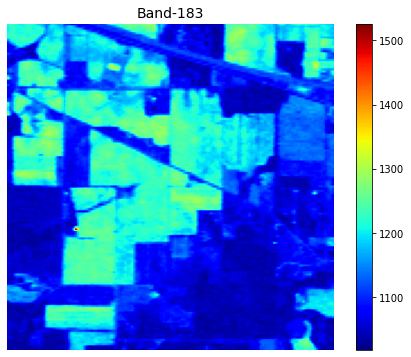

In [3]:
def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
plot_band(dataset)   

In [4]:
!pip install tqdm
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
df = extract_pixels(dataset, Ground_truth)
df.head()

100%|██████████| 200/200 [00:00<00:00, 648.12it/s] 


,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [6]:
df.to_csv('Dataset.csv', index=False)

In [7]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

In [8]:
X.shape, y.shape

((21025, 200), (21025,))

In [9]:
# Reducing dimensions from 200 to 150.

pca = PCA(n_components = 150)

principalComponents = pca.fit_transform(X)

ev=pca.explained_variance_ratio_

In [10]:
# Dividing the reduced data into train and test
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 
                                                                                  test_size = 0.15, random_state = 11)

In [11]:
X_train.shape, X_test.shape

((17871, 150), (3154, 150))

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(150,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(17, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, to_categorical(y_train), batch_size=32, epochs=100, verbose=1, validation_data=(X_test, to_categorical(y_test)))


Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


559/559 [==============================] - 2s 2ms/step - loss: 14.6224 - accuracy: 0.5474 - val_loss: 4.3684 - val_accuracy: 0.5967
Epoch 2/100
559/559 [==============================] - 1s 2ms/step - loss: 2.9449 - accuracy: 0.6347 - val_loss: 2.3862 - val_accuracy: 0.6633
Epoch 3/100
559/559 [==============================] - 1s 2ms/step - loss: 1.6126 - accuracy: 0.6784 - val_loss: 1.6663 - val_accuracy: 0.6563
Epoch 4/100
559/559 [==============================] - 1s 2ms/step - loss: 1.2558 - accuracy: 0.7006 - val_loss: 1.2591 - val_accuracy: 0.6899
Epoch 5/100
559/559 [==============================] - 1s 2ms/step - loss: 0.9530 - accuracy: 0.7316 - val_loss: 1.3278 - val_accuracy: 0.6627
Epoch 6/100
559/559 [==============================] - 1s 2ms/step - loss: 0.8541 - accuracy: 0.7415 - val_loss: 1.0895 - val_accuracy: 0.7013
Epoch 7/100
559/559 [==============================] - 1s 2ms/step - loss: 0.7909 - accuracy: 0.7550 - val_loss: 1.0155 - val_accuracy: 0.7356
Epoch 8/10

99/99 [==============================] - 0s 933us/step


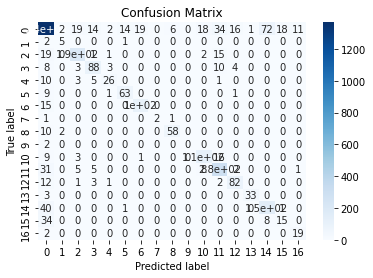

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn's heatmap function
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [18]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



99/99 [==============================] - 0s 964us/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1613
           1       0.56      0.62      0.59         8
           2       0.85      0.83      0.84       228
           3       0.76      0.76      0.76       116
           4       0.76      0.58      0.66        45
           5       0.80      0.85      0.82        74
           6       0.83      0.87      0.85       115
           7       1.00      0.50      0.67         4
           8       0.89      0.83      0.86        70
           9       0.00      0.00      0.00         2
          10       0.80      0.79      0.79       139
          11       0.78      0.85      0.81       336
          12       0.78      0.81      0.80       101
          13       0.97      0.92      0.94        36
          14       0.65      0.78      0.71       189
          15       0.44      0.26      0.33        57
          16       0.61   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


658/658 [==============================] - 1s 904us/step


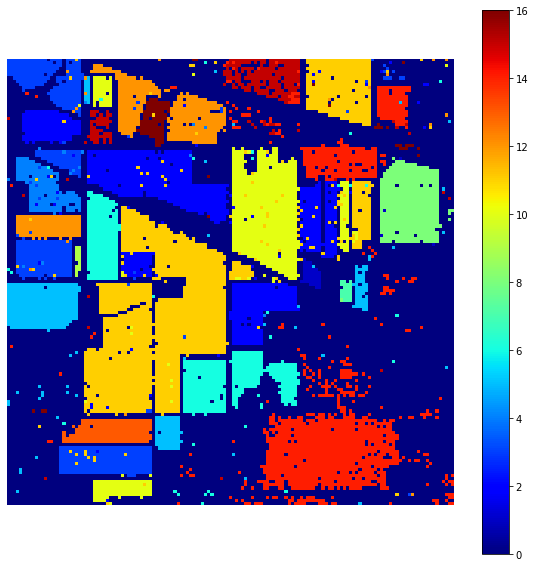

In [19]:
# Reshape the test data to match the input shape of the model
X_all = principalComponents.reshape(-1, 150)

# Apply the trained model to the entire dataset
y_all_prob = model.predict(X_all)

# Convert the predicted probabilities to class labels
y_all = np.argmax(y_all_prob, axis=1)

# Reshape the output into a 2D array with the same dimensions as the input image
class_map = y_all.reshape((145, 145))

# Display the classification map
plt.figure(figsize=(10, 10))
plt.imshow(class_map, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()


In [20]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_classes)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print the results
print("Accuracy: {:.2f}%".format(accuracy*100))
print("F1 Score: {:.2f}".format(f1))


99/99 [==============================] - 0s 882us/step
Accuracy: 82.09%
F1 Score: 0.82


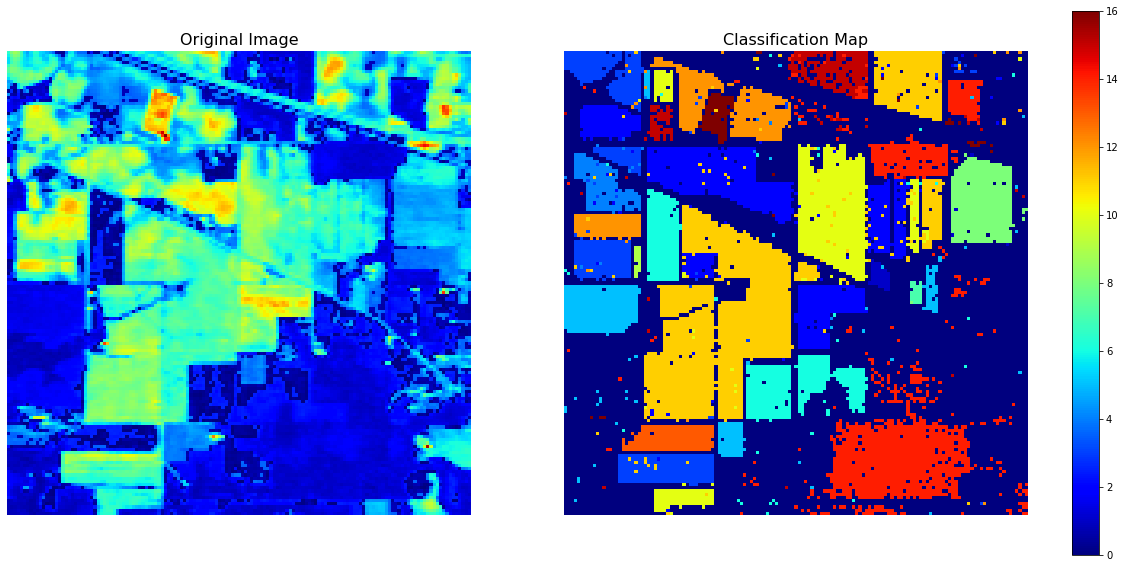

In [21]:
# Plot actual vs predicted labels
# Display the original image and the classification map side-by-side
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Display the original image
ax[0].imshow(dataset[:,:, 20], cmap='jet')
ax[0].set_title('Original Image', fontsize=16)
ax[0].axis('off')

# Display the classification map
im = ax[1].imshow(class_map, cmap='jet')
ax[1].set_title('Classification Map', fontsize=16)
ax[1].axis('off')
fig.colorbar(im, ax=ax.ravel().tolist(), orientation='vertical', fraction=0.046, pad=0.04)

plt.show()


